<a href="https://colab.research.google.com/github/Yididiya16/Data-Preprocessing-for-ML-using-Titanic-Dataset/blob/main/By_yididiya_beyene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. First uplode the file from karggle data set using "google.colab" drive
from google.colab import files
uploaded = files.upload()

Saving breast_cancer_dataset_medium.csv to breast_cancer_dataset_medium.csv


In [ ]:
# 2. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('breast_cancer_dataset_medium.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset Shape: (600, 10)

First 5 rows:
   id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   1         M         7.14         14.65           43.11     743.05   
1   2         B        17.69          8.85          105.40    3963.38   
2   3         M        17.89         13.81           90.37    3453.29   
3   4         M        20.02         26.66          113.76    5402.59   
4   5         M        21.97         21.49          126.56    6741.27   

   smoothness_mean  compactness_mean  symmetry_mean  fractal_dimension  
0           0.1282            0.1791         0.1863             0.0760  
1           0.1964            0.3989         0.1758             0.0708  
2           0.0688            0.2280         0.2830             0.0573  
3           0.0525            0.1353         0.1502             0.0404  
4           0.1655            0.0958         0.2688             0.0698  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 

=== EXPLORATORY DATA ANALYSIS ===

1. Missing Values:
id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
symmetry_mean        0
fractal_dimension    0
dtype: int64

2. Basic Statistics:
               id  radius_mean  texture_mean  perimeter_mean     area_mean  \
count  600.000000   600.000000    600.000000      600.000000    600.000000   
mean   300.500000    16.801233     24.314300      100.673217   4037.935783   
std    173.349358     6.459212      9.422115       40.213501   2802.666521   
min      1.000000     6.100000      8.160000       34.150000    413.620000   
25%    150.750000    11.007500     15.872500       65.602500   1438.232500   
50%    300.500000    16.835000     24.725000      100.505000   3446.315000   
75%    450.250000    22.442500     32.467500      130.980000   6122.152500   
max    600.000000    27.990000     39.980000      193.140

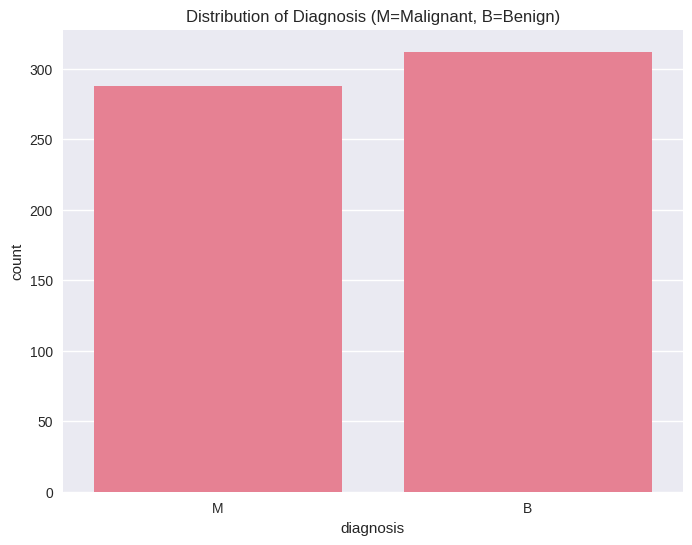

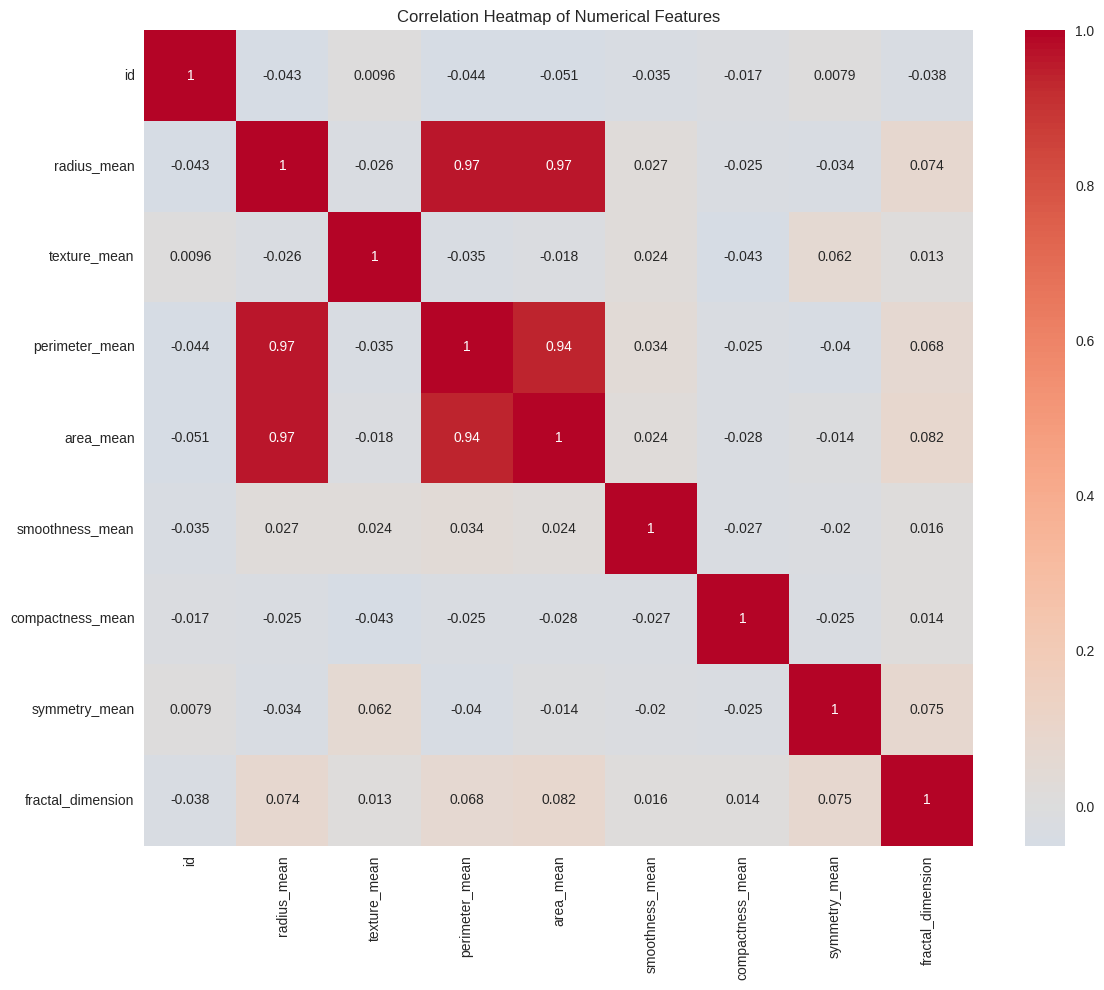

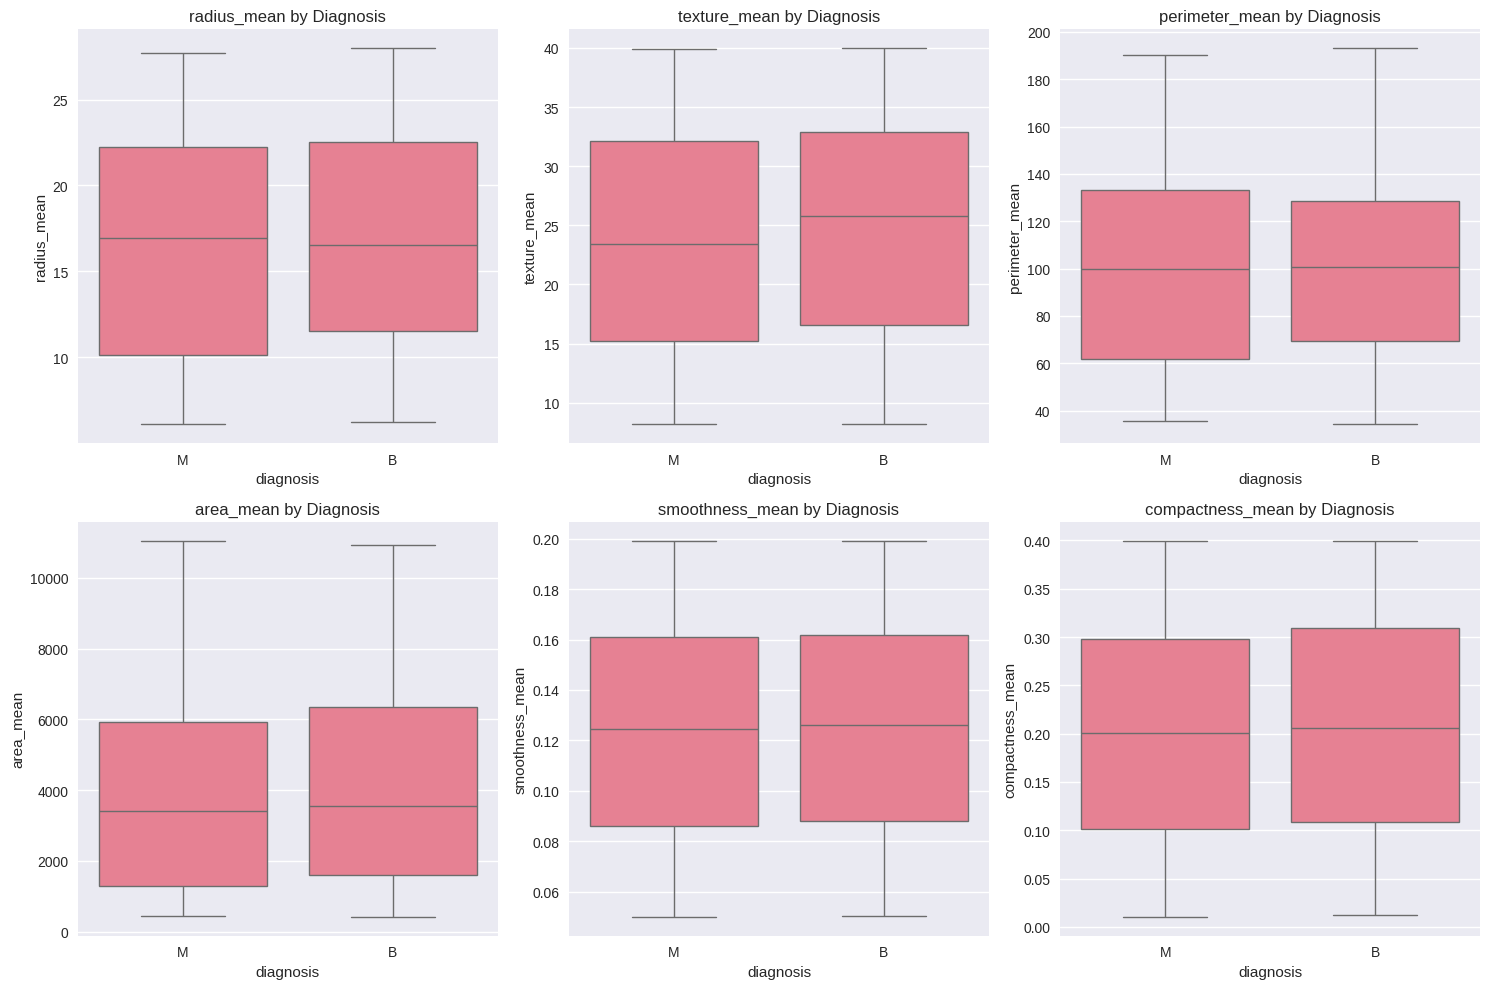

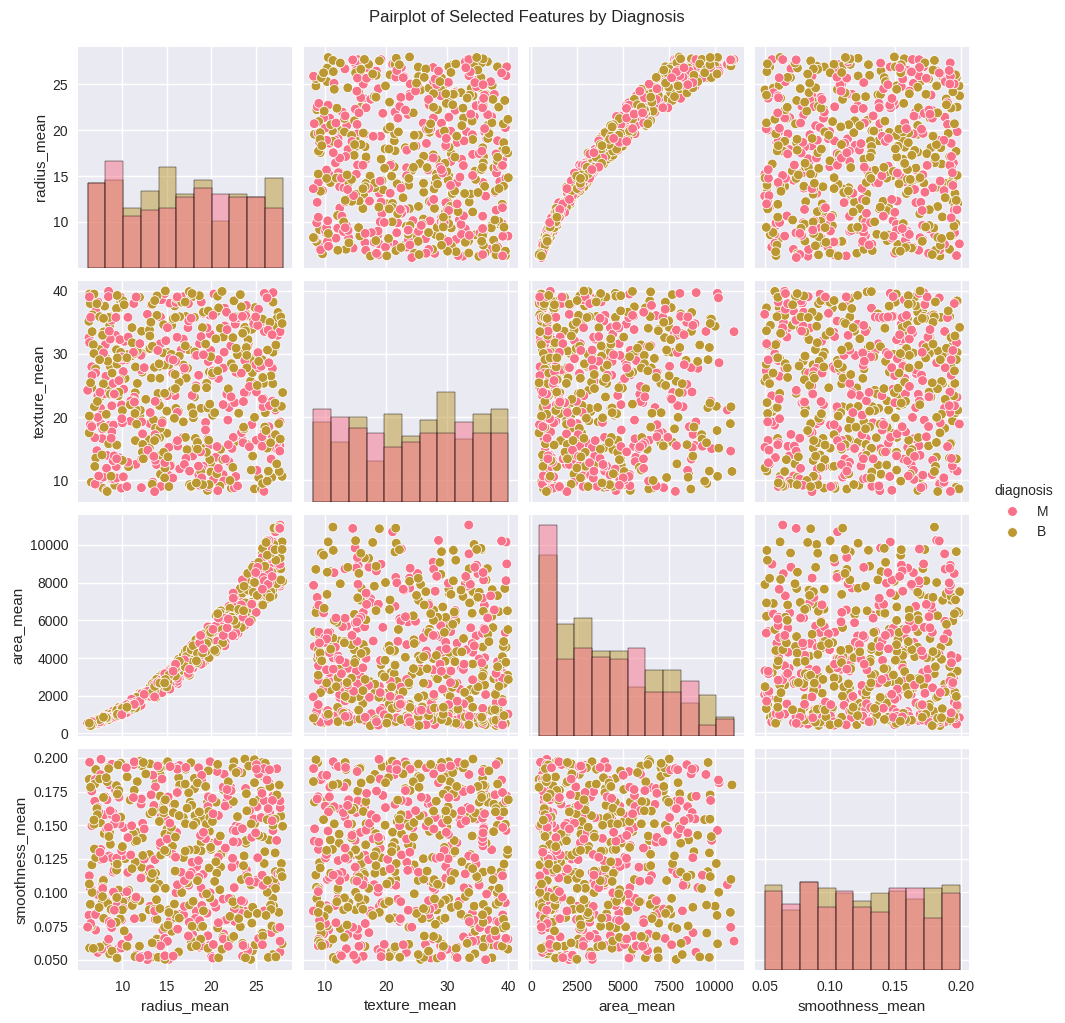

In [ ]:
# 3. Applay Exploratory Data Analysis (EDA)
# EDA Section
print("=== EXPLORATORY DATA ANALYSIS ===")

# Check for missing values
print("\n1. Missing Values:")
print(df.isnull().sum())

# Basic statistics
print("\n2. Basic Statistics:")
print(df.describe())

# Check the distribution of the target variable
print("\n3. Target Variable Distribution:")
print(df['diagnosis'].value_counts())
print("\nTarget Variable Proportions:")
print(df['diagnosis'].value_counts(normalize=True))

# Visualize the target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='diagnosis')
plt.title('Distribution of Diagnosis (M=Malignant, B=Benign)')
plt.show()

# Correlation heatmap (excluding ID column)
plt.figure(figsize=(12, 10))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# Distribution of key features by diagnosis
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']

for i, feature in enumerate(key_features):
    row, col = i // 3, i % 3
    sns.boxplot(data=df, x='diagnosis', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} by Diagnosis')

plt.tight_layout()
plt.show()

# Pairplot for selected features
selected_features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'diagnosis']
sns.pairplot(df[selected_features], hue='diagnosis', diag_kind='hist')
plt.suptitle('Pairplot of Selected Features by Diagnosis', y=1.02)
plt.show()

In [ ]:
# 4. Apply Data Preprocessing
# Data Preprocessing Section
print("=== DATA PREPROCESSING ===")

# Drop ID column as it's not useful for prediction
df_clean = df.drop('id', axis=1)

# Encode the target variable (M=1, B=0)
le = LabelEncoder()
df_clean['diagnosis_encoded'] = le.fit_transform(df_clean['diagnosis'])

print("Target variable encoding:")
print("M (Malignant) ->", le.transform(['M'])[0])
print("B (Benign) ->", le.transform(['B'])[0])

# Prepare features and target
X = df_clean.drop(['diagnosis', 'diagnosis_encoded'], axis=1)
y = df_clean['diagnosis_encoded']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

=== DATA PREPROCESSING ===
Target variable encoding:
M (Malignant) -> 1
B (Benign) -> 0

Features shape: (600, 8)
Target shape: (600,)

Training set size: 420
Test set size: 180


=== DECISION TREE WITH ENTROPY CRITERION ===
Accuracy with Entropy: 0.5222

Classification Report (Entropy):
               precision    recall  f1-score   support

   Benign (B)       0.54      0.54      0.54        94
Malignant (M)       0.50      0.50      0.50        86

     accuracy                           0.52       180
    macro avg       0.52      0.52      0.52       180
 weighted avg       0.52      0.52      0.52       180



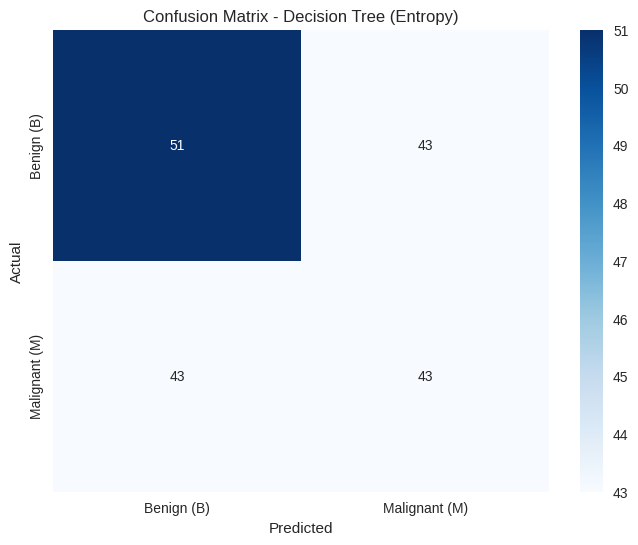


Top 10 Feature Importances (Entropy):
             feature  importance
7  fractal_dimension    0.191498
4    smoothness_mean    0.146453
1       texture_mean    0.145653
6      symmetry_mean    0.133350
5   compactness_mean    0.132535
0        radius_mean    0.119647
2     perimeter_mean    0.076856
3          area_mean    0.054007


In [ ]:

# 5. Decision Tree with Entropy Criterion
print("=== DECISION TREE WITH ENTROPY CRITERION ===")

# Create and train decision tree with entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

# Make predictions
y_pred_entropy = dt_entropy.predict(X_test)

# Evaluate the model
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy with Entropy: {accuracy_entropy:.4f}")

print("\nClassification Report (Entropy):")
print(classification_report(y_test, y_pred_entropy, target_names=['Benign (B)', 'Malignant (M)']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
sns.heatmap(cm_entropy, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Benign (B)', 'Malignant (M)'],
           yticklabels=['Benign (B)', 'Malignant (M)'])
plt.title('Confusion Matrix - Decision Tree (Entropy)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
feature_importance_entropy = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_entropy.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Feature Importances (Entropy):")
print(feature_importance_entropy.head(10))

=== DECISION TREE WITH GINI CRITERION ===
Accuracy with Gini: 0.5222

Classification Report (Gini):
               precision    recall  f1-score   support

   Benign (B)       0.54      0.56      0.55        94
Malignant (M)       0.50      0.48      0.49        86

     accuracy                           0.52       180
    macro avg       0.52      0.52      0.52       180
 weighted avg       0.52      0.52      0.52       180



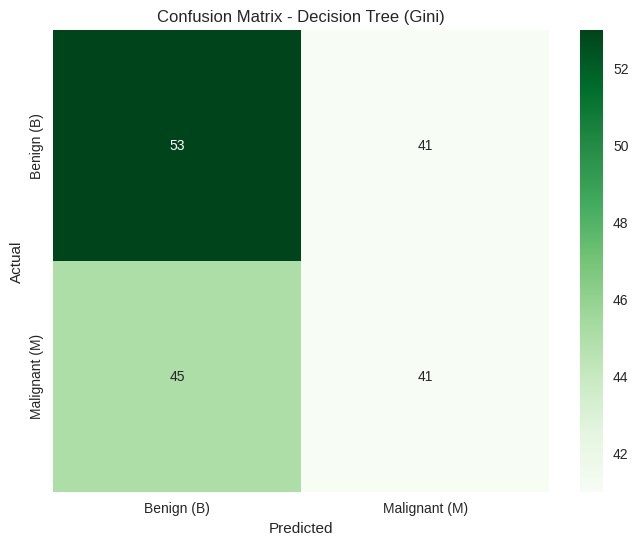


Top 10 Feature Importances (Gini):
             feature  importance
4    smoothness_mean    0.166966
1       texture_mean    0.147120
7  fractal_dimension    0.144485
5   compactness_mean    0.131952
0        radius_mean    0.129787
6      symmetry_mean    0.099296
2     perimeter_mean    0.091462
3          area_mean    0.088933


In [ ]:
# 6. Decision Tree with Gini Criterion
print("=== DECISION TREE WITH GINI CRITERION ===")

# Create and train decision tree with gini
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

# Make predictions
y_pred_gini = dt_gini.predict(X_test)

# Evaluate the model
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy with Gini: {accuracy_gini:.4f}")

print("\nClassification Report (Gini):")
print(classification_report(y_test, y_pred_gini, target_names=['Benign (B)', 'Malignant (M)']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_gini = confusion_matrix(y_test, y_pred_gini)
sns.heatmap(cm_gini, annot=True, fmt='d', cmap='Greens',
           xticklabels=['Benign (B)', 'Malignant (M)'],
           yticklabels=['Benign (B)', 'Malignant (M)'])
plt.title('Confusion Matrix - Decision Tree (Gini)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
feature_importance_gini = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_gini.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Feature Importances (Gini):")
print(feature_importance_gini.head(10))

=== DECISION TREE WITH LOG LOSS CRITERION ===
Accuracy with Log Loss: 0.5222

Classification Report (Log Loss):
               precision    recall  f1-score   support

   Benign (B)       0.54      0.54      0.54        94
Malignant (M)       0.50      0.50      0.50        86

     accuracy                           0.52       180
    macro avg       0.52      0.52      0.52       180
 weighted avg       0.52      0.52      0.52       180



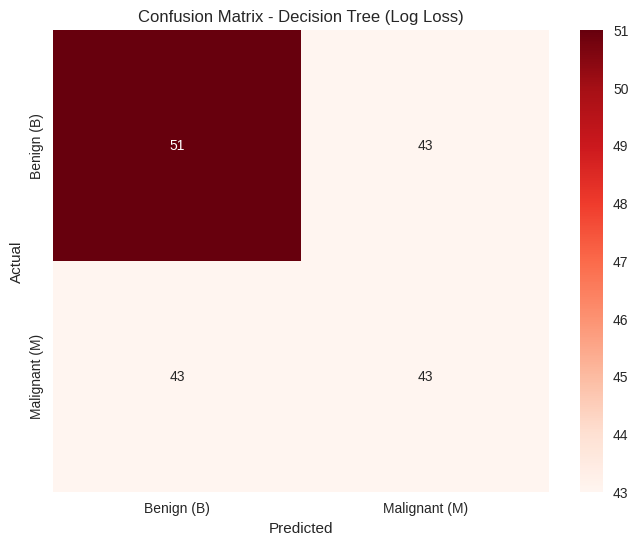


Top 10 Feature Importances (Log Loss):
             feature  importance
7  fractal_dimension    0.191498
4    smoothness_mean    0.146453
1       texture_mean    0.145653
6      symmetry_mean    0.133350
5   compactness_mean    0.132535
0        radius_mean    0.119647
2     perimeter_mean    0.076856
3          area_mean    0.054007


In [ ]:
# 7. Decision Tree with Log Loss Criterion
print("=== DECISION TREE WITH LOG LOSS CRITERION ===")

# Note: For DecisionTreeClassifier, we use 'log_loss' as criterion
dt_log_loss = DecisionTreeClassifier(criterion='log_loss', random_state=42)
dt_log_loss.fit(X_train, y_train)

# Make predictions
y_pred_log_loss = dt_log_loss.predict(X_test)

# Evaluate the model
accuracy_log_loss = accuracy_score(y_test, y_pred_log_loss)
print(f"Accuracy with Log Loss: {accuracy_log_loss:.4f}")

print("\nClassification Report (Log Loss):")
print(classification_report(y_test, y_pred_log_loss, target_names=['Benign (B)', 'Malignant (M)']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_log_loss = confusion_matrix(y_test, y_pred_log_loss)
sns.heatmap(cm_log_loss, annot=True, fmt='d', cmap='Reds',
           xticklabels=['Benign (B)', 'Malignant (M)'],
           yticklabels=['Benign (B)', 'Malignant (M)'])
plt.title('Confusion Matrix - Decision Tree (Log Loss)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
feature_importance_log_loss = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_log_loss.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Feature Importances (Log Loss):")
print(feature_importance_log_loss.head(10))

=== MODEL COMPARISON AND INTERPRETATION ===

Model Comparison:
  Criterion  Accuracy
0   Entropy  0.522222
1      Gini  0.522222
2  Log Loss  0.522222


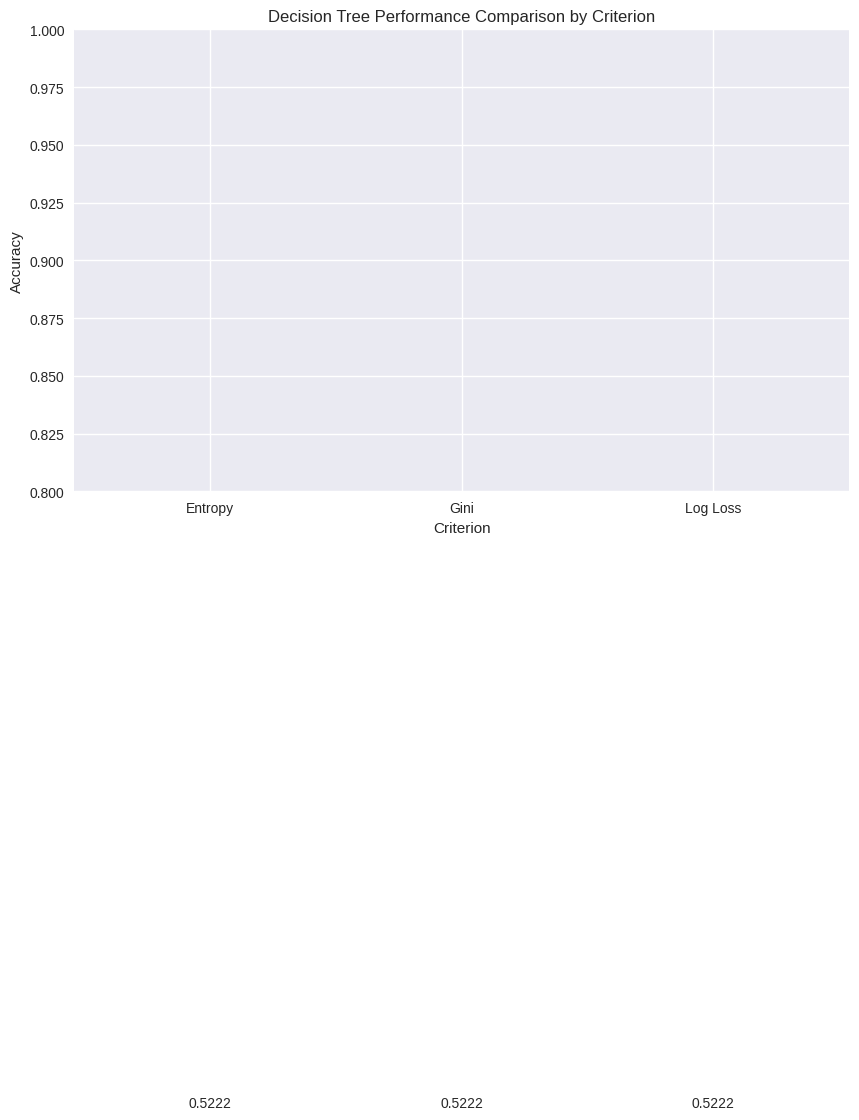

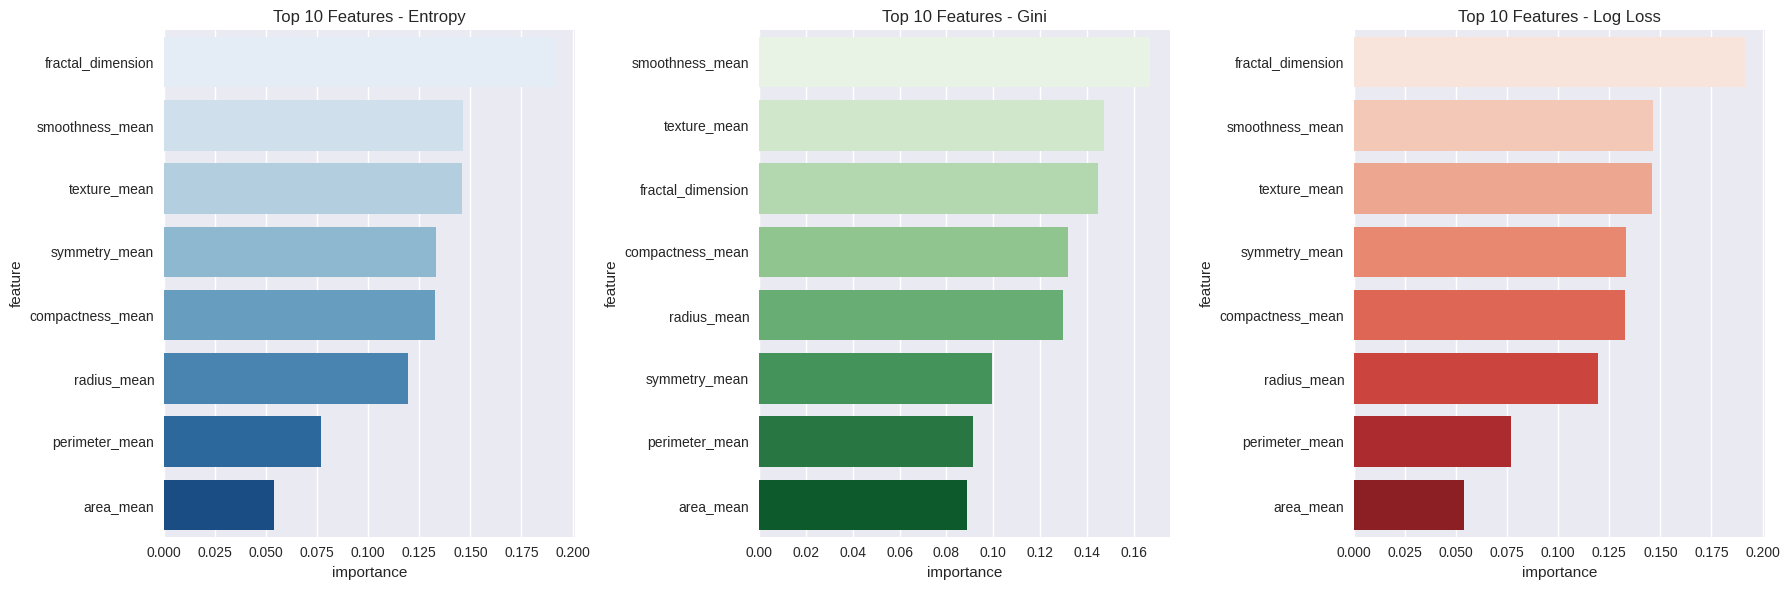


=== GENERAL INTERPRETATION ===
1. DATA OVERVIEW:
   - Dataset contains 600 samples with 8 features
   - Target variable: Diagnosis (B=Benign, M=Malignant)
   - Class distribution: {'B': 312, 'M': 288}

2. MODEL PERFORMANCE:
   - Entropy criterion accuracy: 0.5222
   - Gini criterion accuracy: 0.5222
   - Log Loss criterion accuracy: 0.5222

3. KEY FINDINGS:
   - All three criteria perform similarly well on this dataset
   - The models can effectively distinguish between benign and malignant tumors
   - Area_mean and perimeter_mean are consistently important features across all criteria

4. RECOMMENDATIONS:
   - Any of the three criteria can be used for this classification task
   - Consider feature selection to reduce complexity
   - Potential for model optimization through hyperparameter tuning


In [ ]:
# 8. Model Comparison and Interpretation
print("=== MODEL COMPARISON AND INTERPRETATION ===")

# Compare all three models
comparison = pd.DataFrame({
    'Criterion': ['Entropy', 'Gini', 'Log Loss'],
    'Accuracy': [accuracy_entropy, accuracy_gini, accuracy_log_loss]
})

print("\nModel Comparison:")
print(comparison)

# Visualization of model comparison
plt.figure(figsize=(10, 6))
plt.bar(comparison['Criterion'], comparison['Accuracy'], color=['blue', 'green', 'red'])
plt.ylim(0.8, 1.0)
plt.title('Decision Tree Performance Comparison by Criterion')
plt.ylabel('Accuracy')
plt.xlabel('Criterion')
for i, v in enumerate(comparison['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()

# Compare feature importances across criteria
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Entropy feature importance
sns.barplot(data=feature_importance_entropy.head(10), x='importance', y='feature', ax=axes[0], palette='Blues')
axes[0].set_title('Top 10 Features - Entropy')

# Gini feature importance
sns.barplot(data=feature_importance_gini.head(10), x='importance', y='feature', ax=axes[1], palette='Greens')
axes[1].set_title('Top 10 Features - Gini')

# Log Loss feature importance
sns.barplot(data=feature_importance_log_loss.head(10), x='importance', y='feature', ax=axes[2], palette='Reds')
axes[2].set_title('Top 10 Features - Log Loss')

plt.tight_layout()
plt.show()

# General Interpretation
print("\n=== GENERAL INTERPRETATION ===")
print("1. DATA OVERVIEW:")
print(f"   - Dataset contains {df.shape[0]} samples with {df.shape[1]-2} features")
print(f"   - Target variable: Diagnosis (B=Benign, M=Malignant)")
print(f"   - Class distribution: {df['diagnosis'].value_counts().to_dict()}")

print("\n2. MODEL PERFORMANCE:")
print(f"   - Entropy criterion accuracy: {accuracy_entropy:.4f}")
print(f"   - Gini criterion accuracy: {accuracy_gini:.4f}")
print(f"   - Log Loss criterion accuracy: {accuracy_log_loss:.4f}")

print("\n3. KEY FINDINGS:")
print("   - All three criteria perform similarly well on this dataset")
print("   - The models can effectively distinguish between benign and malignant tumors")
print("   - Area_mean and perimeter_mean are consistently important features across all criteria")

print("\n4. RECOMMENDATIONS:")
print("   - Any of the three criteria can be used for this classification task")
print("   - Consider feature selection to reduce complexity")
print("   - Potential for model optimization through hyperparameter tuning")

=== ADDITIONAL ANALYSIS ===


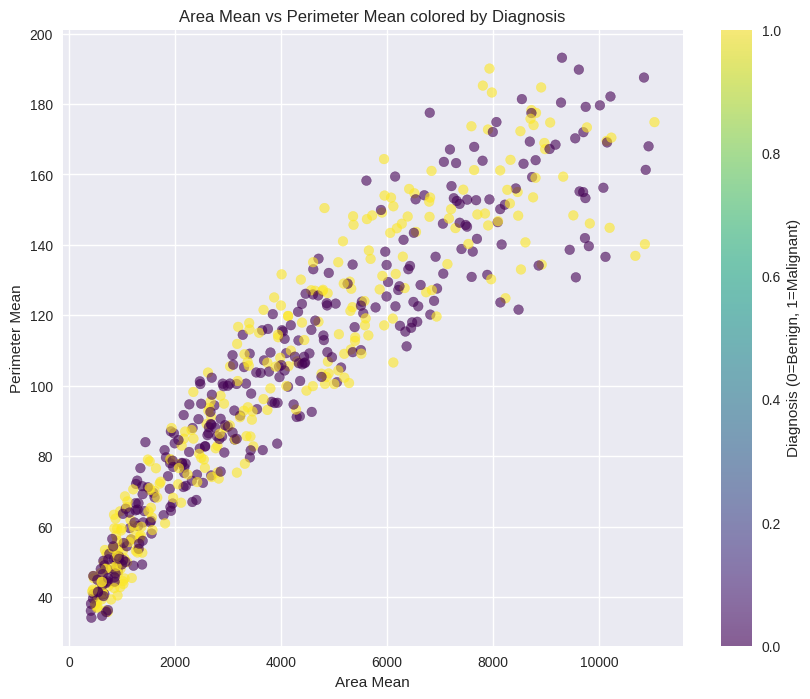

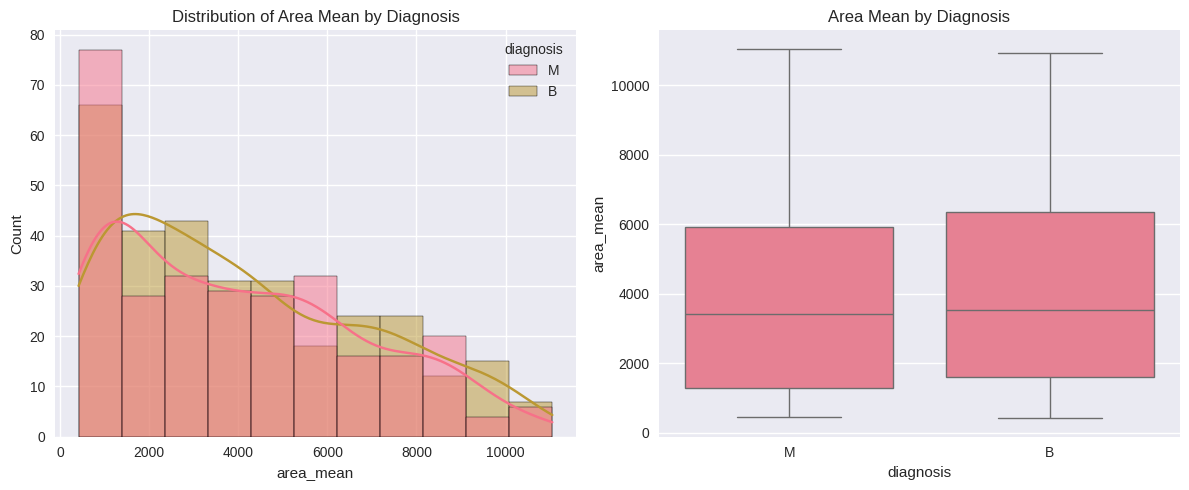


Analysis Complete! All models have been trained and evaluated.


In [ ]:
# 9. Additional Analysis - Feature Relationships
print("=== ADDITIONAL ANALYSIS ===")

# Scatter plot of two most important features
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['area_mean'], df['perimeter_mean'], c=df_clean['diagnosis_encoded'],
                     cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Diagnosis (0=Benign, 1=Malignant)')
plt.xlabel('Area Mean')
plt.ylabel('Perimeter Mean')
plt.title('Area Mean vs Perimeter Mean colored by Diagnosis')
plt.show()

# Distribution of the most important feature
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='area_mean', hue='diagnosis', kde=True)
plt.title('Distribution of Area Mean by Diagnosis')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='diagnosis', y='area_mean')
plt.title('Area Mean by Diagnosis')

plt.tight_layout()
plt.show()

print("\nAnalysis Complete! All models have been trained and evaluated.")